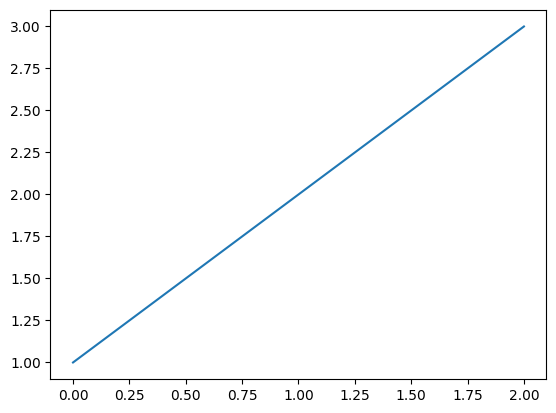

torch.Size([10000, 32, 32, 3])

In [1]:

import os 
import matplotlib.pyplot as plt
plt.plot([1,2,3])
plt.show()
from NNforshow import *

import pandas as pd
import numpy as np
import random
import input_data
import pickle

def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

def plot_with_values(x, y1, y2=None, precision=1):
    """
    绘制带有数据点数值的折线图
    参数：
    x: X轴数据
    y1: 第一条线的Y轴数据
    y2: 第二条线的Y轴数据（可选）
    precision: 显示数值的小数位数
    """
    plt.plot(x, y1, label='Test 1')
    
    # 显示第一条线的数据点的值
    for i in range(len(y1)):
        plt.text(i, y1[i], f'{y1[i]:.{precision}f}', ha='center', va='bottom')
    
    if y2 is not None:
        plt.plot(x, y2, label='Test 2')
        # 显示第二条线的数据点的值
        for i in range(len(y2)):
            plt.text(i, y2[i], f'{y2[i]:.{precision}f}', ha='center', va='bottom')
    
    plt.legend()
    plt.show()
    
device = torch.device( "cpu")
device

current_file = os.path.abspath ('')
current_dir = os.path.dirname (current_file)
target_file = os.path.join (current_dir+"\\vision\\", "handmadecnn", "cifar-10-batches-py")

data = unpickle(target_file+"\\data_batch_1")
Y = torch.tensor(data[b'labels']).to(device)
X = data[b'data'].reshape(10000, 3,32,32)
X = X.swapaxes(1,3).swapaxes(1,2)

X = torch.tensor(X/255).to(device)
MAXNUM = 10000
X.shape

In [2]:
def plot_with_values(models, dataset_name, num_layers, sample_size, precision=1):
    """
    Plot a line chart with data point values and save the results to a CSV file.

    Parameters:
    models (list): List of model objects containing 'testhis' data.
    dataset_name (str): Name of the dataset (e.g., "Wine Dataset").
    num_layers (int): Number of layers in the model.
    sample_size (int): Size of the training dataset.
    precision (int): Number of decimal places to display for data point values.
    """
    labels = [
        'Our Proposed Method',
        'Our Method with Stabilizer',
        'Baseline Method',
        'L2 Regularization (λ=0.01)',
        'L2 Regularization (λ=0.1)'
    ]
    
    x_values = range(len(models[0].testhis))  # Assuming x-axis is the epoch index
    csv_dict = {'Epoch': x_values}
    
    for i in range(len(models)):
        y = np.array(models[i].testhis)/100
        plt.plot(x_values, y, label=labels[i])
        
        # Add data for CSV
        csv_dict[labels[i]] = y
        
        # Display data point values
        for j in range(len(y)):
            plt.text(x_values[j], y[j], f'{y[j]:.{precision}f}', ha='center', va='bottom')
    
    # Set the plot title and labels in English
    plt.title(f'Results on {dataset_name} Dataset with {num_layers} Layers and Sample Size {sample_size}')
    plt.xlabel('Training Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
    # Save the data to a CSV file
    df = pd.DataFrame(csv_dict)
    safe_dataset_name = dataset_name.replace(' ', '_')
    csv_filename = f'{safe_dataset_name}_layers{num_layers}_samples{sample_size}.csv'
    df.to_csv(csv_filename, index=False)

    
def trainmodelset(modelset):
    for i in range(5):
        m = modelset.models[i]

        if i <3: #如果属于self.model_my, self.model_mystable, self.model_base
            right = modelset.train_step(m, X, Y)
        else: #如果属于self.model_L2light, self.model_L2heavy
            right = modelset.train_step_L2(m, X, Y)
        m.trainhis.append(right)

        right2 = modelset.test_step(m, X,Y)
        m.testhis.append(right2)

        print(i+1, right2)

In [3]:

inputn=32*32*3
nnumber1=20
nnumber2=10


model100 = Classification(MAXNUM, inputn, 100, device)
model100.build_model(2, inputn, nnumber1, nnumber2 )


In [4]:
for i in range(6):
    print("turn ", i)
    trainmodelset(model100)


turn  0
1 2357.5757575757575
2 2403.030303030303
3 2340.4040404040406
4 2325.252525252525
5 2477.777777777778
turn  1
1 2356.5656565656564
2 2310.10101010101
3 2308.080808080808
4 2272.7272727272725
5 2377.777777777778
turn  2
1 2393.939393939394
2 2479.7979797979797
3 2319.191919191919
4 2282.8282828282827
5 2381.818181818182
turn  3
1 2357.5757575757575
2 2478.7878787878785
3 2307.070707070707
4 2277.777777777778
5 2457.5757575757575
turn  4
1 2433.3333333333335
2 2444.4444444444443
3 2307.070707070707
4 2266.6666666666665
5 2454.5454545454545
turn  5
1 2423.2323232323233
2 2452.5252525252527
3 2306.060606060606
4 2277.777777777778
5 2425.252525252525


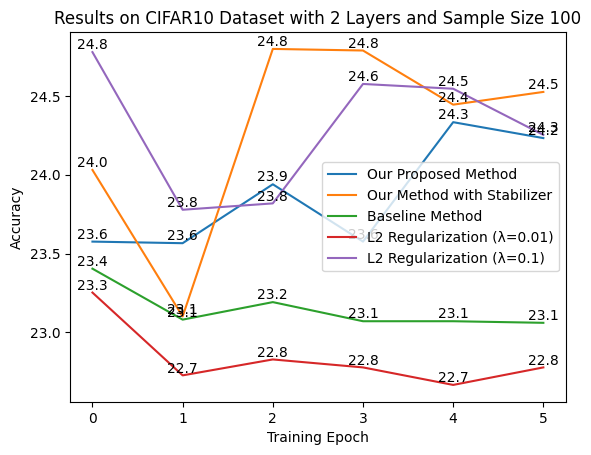

In [5]:

plot_with_values(model100.models, "CIFAR10", 2, 100)


In [6]:
for i in range(5):
    m = model100.models[i]
    print( i, model100.test_step_noise(m, X ,Y) )

0 2270.7070707070707
1 2296.969696969697
2 2183.838383838384
3 2191.9191919191917
4 2331.313131313131


In [7]:
model500 = Classification(MAXNUM, inputn, 500, device)
model500.build_model(2, inputn, nnumber1, nnumber2 )


In [8]:
for i in range(6):
    print("turn ", i)
    trainmodelset(model500)


turn  0
1 2279.4658816107667
2 2670.5919461675953
3 2558.0906318999055
4 2662.1806329513197
5 2747.345179266113
turn  1
1 2681.10608768794
2 3077.489223004942
3 2920.8285143518033
4 2837.7667963410786
5 2895.5945747029755
turn  2
1 2991.273262538114
2 3104.8259909578387
3 2876.6691199663546
4 2917.6742718957
5 3019.661444643045
turn  3
1 2650.61507727894
2 3114.2887183261487
3 2915.5714435916307
4 2833.561139732941
5 3043.843970139838
turn  4
1 2704.237199032699
2 3205.7617495531485
3 2711.5970980969405
4 2816.738513300389
5 3063.820839028493
turn  5
1 2337.293659972663
2 3161.602355167701
3 2786.247502891389
4 2925.034170959941
5 3021.764272947114


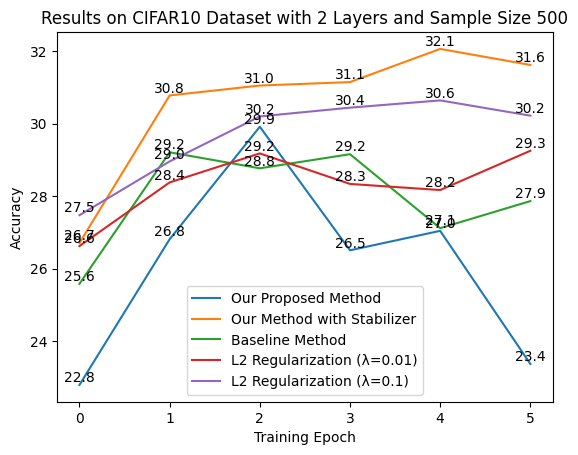

In [14]:

plot_with_values(model500.models, "CIFAR10", 2, 500)


In [10]:
for i in range(5):
    m = model500.models[i]
    print( i, model500.test_step_noise(m, X ,Y) )

0 2181.6843654715594
1 3024.918515403217
2 2499.2114393859742
3 2655.8721480391127
4 2846.1781095573547


In [11]:

model1000 = Classification(MAXNUM, inputn, 1000, device)
model1000.build_model(2, inputn, nnumber1, nnumber2 )


In [12]:
for i in range(6):
    print("turn ", i)
    trainmodelset(model1000)


turn  0
1 2342.212888250249
2 2575.4393721675697
3 2793.1911130761578
4 2739.0295125455955
5 2747.8722228362994
turn  1
1 2905.935669282635
2 2533.4364982867246
3 3017.5748867027746
4 3026.4175969934786
5 3139.162153199956
turn  2
1 3162.374267713054
2 3143.583508345308
3 3056.2617442246046
4 2848.4580523930586
5 2963.413286172212
turn  3
1 3249.696031833757
2 3282.856195423897
3 3083.895213883055
4 2881.6182159831988
5 2925.8317674367195
turn  4
1 3004.310821266718
2 3145.7941859179837
3 2984.414723112634
4 3037.4709848568586
5 2993.257433403338
turn  5
1 3052.945727865591
2 3159.05825135404
3 2934.6744777274234
4 3057.3670830109427
5 3061.788438156295


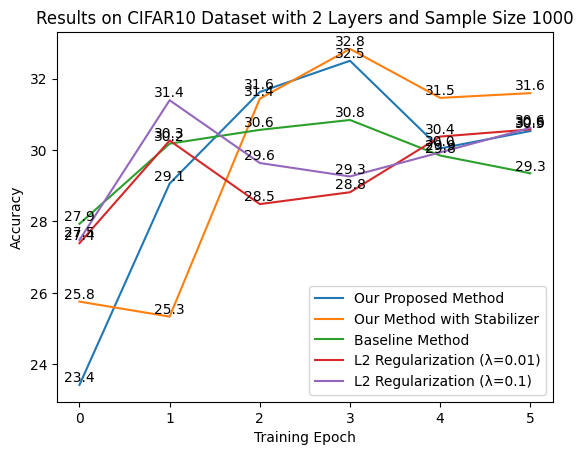

In [15]:

plot_with_values(model1000.models, "CIFAR10", 2, 1000)


In [16]:
for i in range(5):
    m = model1000.models[i]
    print( i, model1000.test_step_noise(m, X ,Y) )

0 2887.144909914889
1 3091.632585387421
2 2674.9198629379907
3 2795.401790648834
4 2903.724991709959


In [17]:

inputn=32*32*3
nnumber1=64
nnumber2=32
nnumber3=10

model100 = Classification(MAXNUM, inputn, 100, device)
model100.build_model(3, inputn, nnumber1, nnumber2, nnumber3 )


In [18]:
for i in range(6):
    print("turn ", i)
    trainmodelset(model100)


turn  0
1 2603.030303030303
2 2614.1414141414143
3 2419.191919191919
4 2513.131313131313
5 2646.464646464646
turn  1
1 2481.8181818181815
2 2392.929292929293
3 2334.343434343434
4 2494.9494949494947
5 2557.5757575757575
turn  2
1 2451.5151515151515
2 2412.121212121212
3 2323.2323232323233
4 2511.1111111111113
5 2517.1717171717173
turn  3
1 2453.5353535353534
2 2422.222222222222
3 2329.2929292929293
4 2487.878787878788
5 2570.7070707070707
turn  4
1 2440.40404040404
2 2432.3232323232323
3 2343.4343434343436
4 2506.060606060606
5 2565.6565656565654
turn  5
1 2456.5656565656564
2 2376.7676767676767
3 2326.2626262626263
4 2485.8585858585857
5 2566.6666666666665


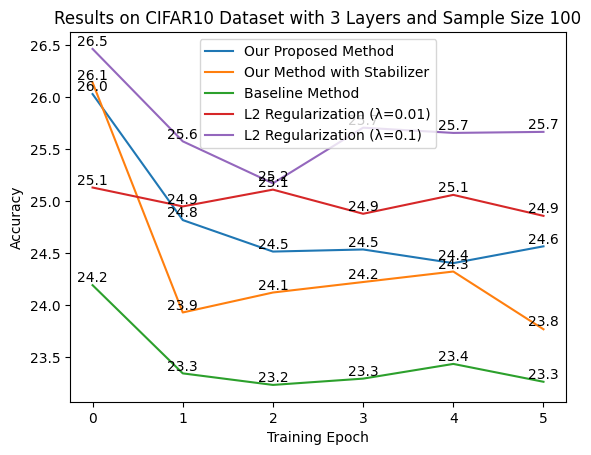

In [19]:

plot_with_values(model100.models, "CIFAR10", 3, 100)


In [20]:
for i in range(5):
    m = model100.models[i]
    print( i, model100.test_step_noise(m, X ,Y) )

0 2326.2626262626263
1 2287.878787878788
2 2173.7373737373737
3 2323.2323232323233
4 2446.464646464646


In [21]:
model500 = Classification(MAXNUM, inputn, 500, device)
model500.build_model(3, inputn, nnumber1, nnumber2, nnumber3 )


In [22]:
for i in range(6):
    print("turn ", i)
    trainmodelset(model500)


turn  0
1 2977.6048785616654
2 2729.471138681527
3 2876.6691199663546
4 2852.4865944695616
5 3097.466091893597
turn  1
1 2941.8567973924933
2 3088.0033645252865
3 3234.1499316580803
4 2849.332352013458
5 3015.455788034907
turn  2
1 3237.3041741141833
2 3204.7103354011147
3 3275.155083587425
4 3055.409525812218
5 3191.0419514246664
turn  3
1 3150.036799495321
2 3267.7951845231833
3 3152.1396277993904
4 2947.1138681526654
5 3116.391546630218
turn  4
1 3166.859425927873
2 3211.0188203133216
3 3115.340132478183
4 3046.998212595942
5 3127.957102302597
turn  5
1 3155.293870255494
2 3054.358111660183
3 3156.3452844075277
4 3054.358111660183
5 3179.476395752287


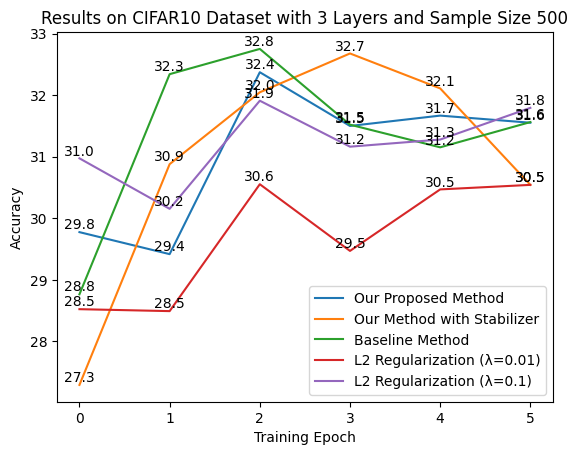

In [23]:

plot_with_values(model500.models, "CIFAR10", 3, 500)


In [24]:
for i in range(5):
    m = model500.models[i]
    print( i, model500.test_step_noise(m, X ,Y) )

0 2886.1318473346655
1 2796.761644411734
2 2910.3143728314585
3 2823.046998212596
4 2919.7771001997685


In [25]:

model1000 = Classification(MAXNUM, inputn, 1000, device)
model1000.build_model(3, inputn, nnumber1, nnumber2, nnumber3 )


In [26]:
for i in range(6):
    print("turn ", i)
    trainmodelset(model1000)


turn  0
1 2909.251685641649
2 2932.463800154748
3 2862.827456615453
4 2861.7221178291147
5 2956.7812534541836
turn  1
1 3016.4695479164366
2 2876.091522051509
3 3238.642643970377
4 3082.789875096717
5 3274.013485133193
turn  2
1 3184.481043439814
2 3211.009174311927
3 3302.7522935779816
4 3182.270365867138
5 2977.7826903946057
turn  3
1 3313.8056814413617
2 3440.919641870233
3 3344.7551674588262
4 3339.228473527136
5 3160.163590140378
turn  4
1 3157.952912567702
2 3220.957223388969
3 3325.96440809108
4 3387.863380126009
5 3244.169337902067
turn  5
1 3207.6931579529128
2 3339.228473527136
3 3366.8619431855864
4 3423.234221288825
5 3374.5993146899523


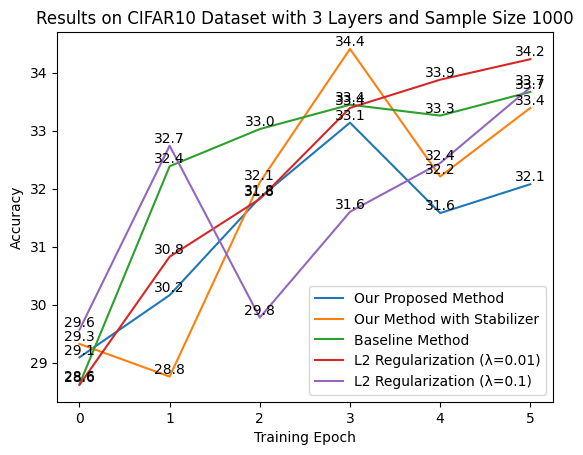

In [27]:

plot_with_values(model1000.models, "CIFAR10", 3, 1000)


In [28]:
for i in range(5):
    m = model1000.models[i]
    print( i, model1000.test_step_noise(m, X ,Y) )

0 3026.4175969934786
1 3149.110202276998
2 3088.3165690284072
3 3173.427655576434
4 3117.0553774731957


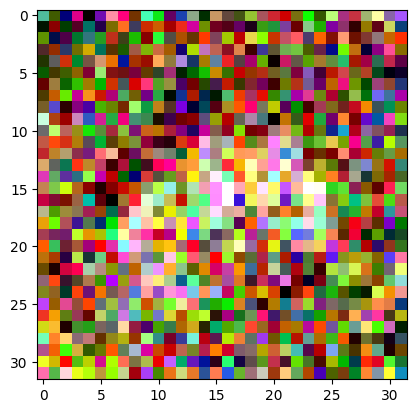

In [144]:

plt.imshow(np.clip((X[0] +np.random.randn(32,32,3)*0.3), 0, 1))
# plt.imshow(X[0])